In [1]:
abstract cme257matrix

In [2]:
type cme257rank1{T} <: cme257matrix
    ## a rank-1 matrix type
    # A = u*v'
    # m is size of matrix
    u::Array{T, 1}
    v::Array{T, 1}
    m::Int64
end

function cme257rank1{T}(u::Array{T, 1}, v::Array{T, 1})
    @assert length(u) == length(v) # we're only dealing with square matrices
    return cme257rank1(u, v, length(u))
end

import Base.*
function *{T}(A::cme257rank1{T}, v::Array{T,1})
    @assert A.m == length(v) # make sure vector is right size for matrix
    c = dot(A.v, v)
    return copy(A.u) * c
end
;

In [3]:
A = cme257rank1(2*ones(10), 3*ones(10))
v = randn(10)
A *v

10-element Array{Float64,1}:
 -43.9516
 -43.9516
 -43.9516
 -43.9516
 -43.9516
 -43.9516
 -43.9516
 -43.9516
 -43.9516
 -43.9516

In [4]:
type cme257diagonal{T} <: cme257matrix
    d::Array{T, 1}
    m::Int64
end

function cme257diagonal{T}(d::Array{T, 1})
    return cme257diagonal(d, length(d))
end

import Base.*
function *{T}(A::cme257diagonal{T}, v::Array{T,1})
    @assert A.m == length(v) # make sure vector is right size for matrix
    return A.d .* v
end
;

In [5]:
B = cme257diagonal(randn(10))
v = randn(10)
@show B * v
;

B * v = [0.3533004923269703,0.5799751123510724,0.6257091683705369,2.1462499618735436,0.6592739255415409,0.08093551827066077,-0.11568919525226651,0.011089395842862431,-0.21017950943691038,-0.18660505973659078]


In [9]:
sizes = [10 50 100 500 1000 5000 10000]'
time_full = zeros(length(sizes))
time_r1 = zeros(length(sizes))
n_inner = 50 # average time over this many iterations
for i = 1:length(sizes)
    n = sizes[i]
    u = randn(n)
    v = randn(n)
    A = cme257rank1(u, v)
    B = u * v'
    
    for j = 1:n_inner
        w = randn(n)
    
        tic()
        a = A * w
        time_full[i] += toq()
    
        tic()
        b = B * w
        time_r1[i] += toq()
    end
end
time_full /= n_inner
time_r1 /= n_inner
;

In [10]:
using PyPlot

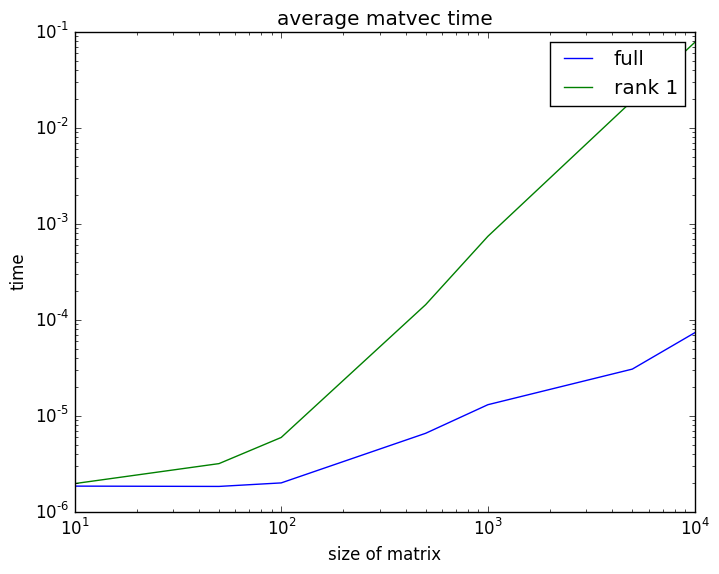

In [11]:
loglog(sizes, time_full)
loglog(sizes, time_r1)
xlabel("size of matrix")
ylabel("time")
legend(["full"; "rank 1"])
title("average matvec time")
;

In [14]:
function top_eigvec(A::cme257matrix)
    n = A.m 
    v = randn(n)
    v_prev = zeros(n)
    while !isapprox(v, v_prev) && !isapprox(v, -v_prev)
        v_prev = copy(v)
        v = A * v_prev
        v /= norm(v,2)
    end
    return v
end
;

In [16]:
b = randn(10)
b /= norm(b)
a = top_eigvec(cme257rank1(b, ones(10)))
@show a
@show b
;

a = [0.331312862947471,0.36026033114699607,0.20855521873921887,0.15668658055854165,-0.6143260554792257,-0.10227904451612733,0.08232928180752992,0.1416747034983764,-0.520562992951114,0.08188497777126384]
b = [0.331312862947471,0.36026033114699607,0.20855521873921887,0.15668658055854165,-0.6143260554792257,-0.10227904451612733,0.08232928180752992,0.1416747034983764,-0.520562992951114,0.08188497777126384]


In [18]:
b = rand(10) * 10
a = top_eigvec(cme257diagonal(b))
@show b
@show a
;

b = [1.4691416194385698,5.827029920345437,1.1263366465757363,2.2151743869722607,8.762307213217898,6.937273031144146,8.372680357385544,8.949700744710823,2.543371099066858,3.2399482664726276]
a = [-0.0,1.263063987371548e-125,-0.0,-0.0,6.898157078848778e-7,1.4452883139166583e-74,-4.665063672475049e-20,0.999999999999762,-0.0,-1.2445388013286935e-293]
